# **23.02.02 initial phase velocity omega**

In [1]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.To_Draw import Draw_theoretical as DDD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from TO_sim.Utility import *

In [2]:
DF = 'Review/23.02.02 initial phase velocity omega/'
Create_Folder(DF)

In [3]:
N = 500
dist = 'Normal'
t_end = 200
ss = 14
N = 500
dK = 0.2
dt = 0.1
m = 0
applys = [1]
save = True
ms = [0.95,2,6]
# Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

for m in tqdm(ms):
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10\
                ,second_initial_state = True,Init_dtheta_omega = False)
    df_sets[m] = df
    rdf_sets[m] = rdf

100%|██████████| 3/3 [02:59<00:00, 59.81s/it]


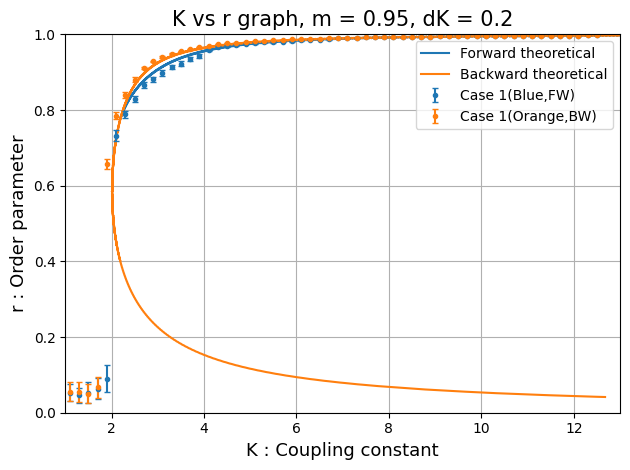

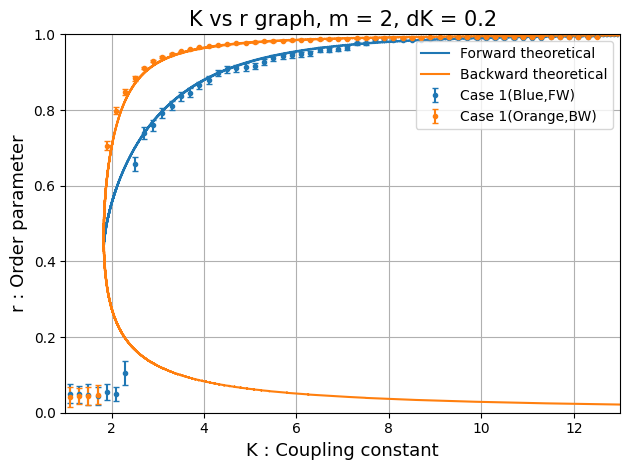

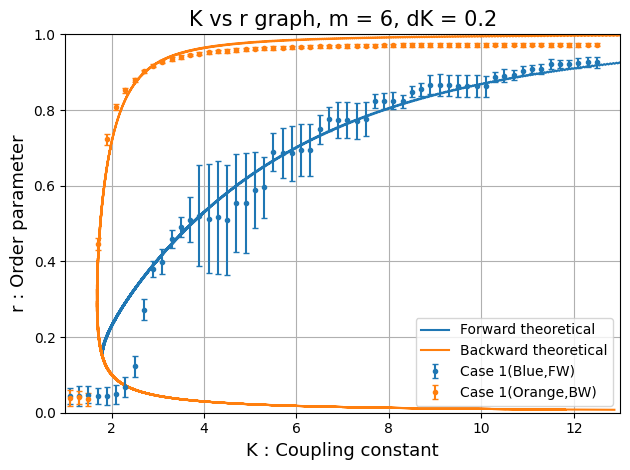

In [4]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist} not r=0/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    Draw_.total()

    plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Case 1(Blue,FW)')
    plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Case 1(Orange,BW)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}, dK = {dK}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    plt.savefig(DF+f'{dist} not r=0/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)

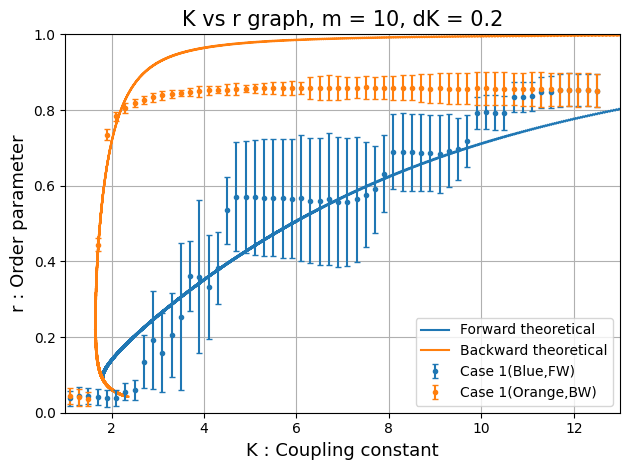

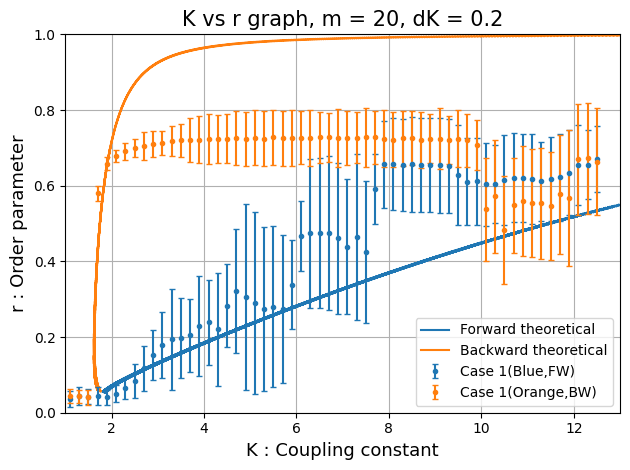

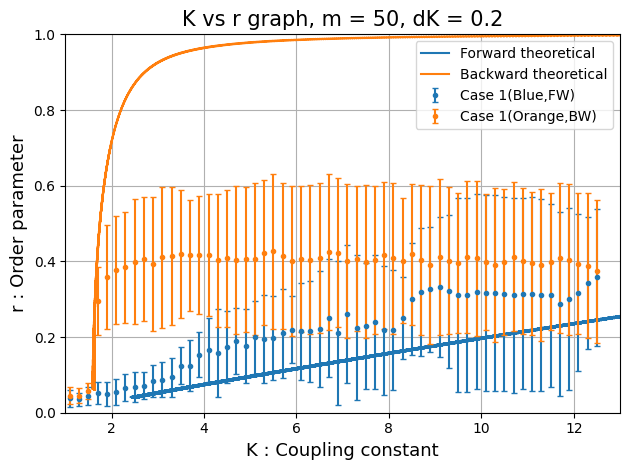

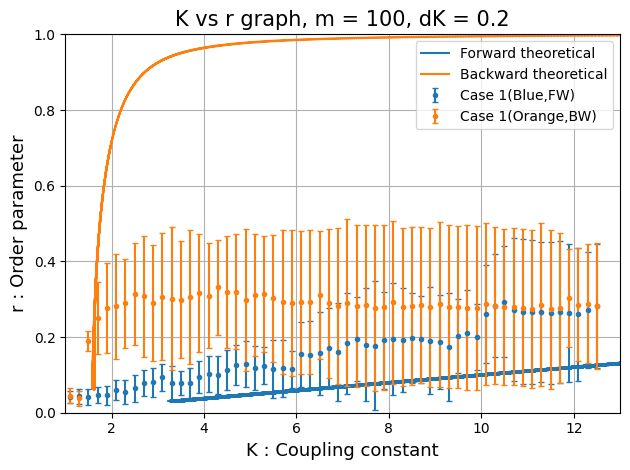

In [29]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist} not r=1/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    Draw_.total()

    plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Case 1(Blue,FW)')
    plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Case 1(Orange,BW)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}, dK = {dK}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    plt.savefig(DF+f'{dist} not r=1/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)

In [28]:
df.iloc[0].ts
df.iloc[0].rs

array([0.01999917, 0.01999925, 0.01999952, ..., 0.03736081, 0.04042319,
       0.04296382])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.log

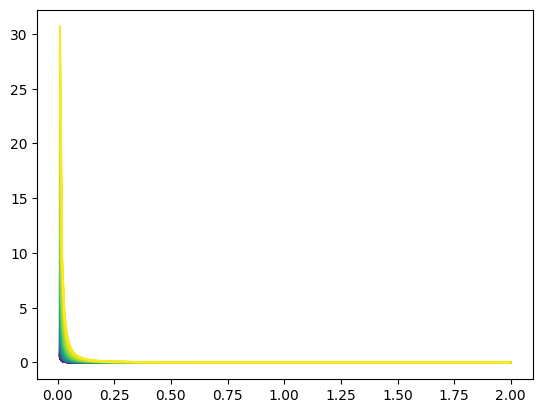

In [21]:
hs = np.logspace(np.log10(1e-4),np.log10(1e-2),100)
line = np.linspace(0,1,len(hs))
color = plt.cm.viridis(line)
for i,h in enumerate(hs):
    xs = np.arange(1e-2,2,h)
    fs = np.array([(np.log(x+h)-np.log(x))/h for x in xs])
    err = 1/xs - fs
    # plt.plot(xs,fs,color=color[i])
    plt.plot(xs,err,color=color[i])
# plt.xscale('log')
# plt.yscale('log')

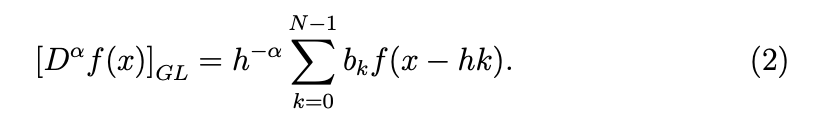

In [24]:
!python3.11 -m pip install differint

In [65]:
import differint.differint as df
import numpy as np
def f(x):return 1/np.tan(x)
ns = np.arange(0.05,1.01,0.05)
# for n in ns:
DF_s = [df.RL(n, f, 1e-1, 10, 500) for n in ns]
xs = np.linspace(1e-1,10,500)

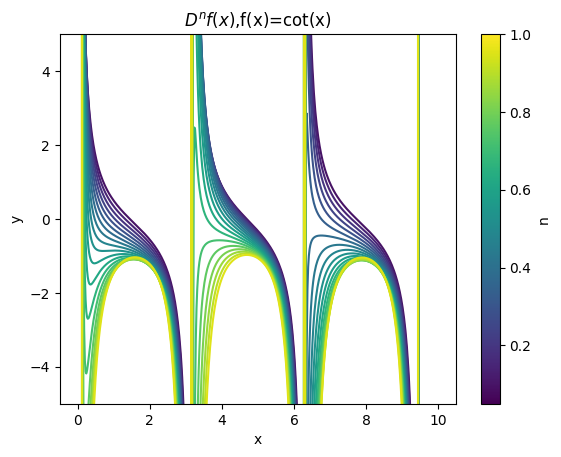

In [66]:
color = plt.cm.viridis(ns)
for i,DF in enumerate(DF_s[:-1]):
    plt.plot(xs,DF,color=color[i])
plt.ylim(-5,5)
plt.scatter(0*ns,ns,s=0,c=ns)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$D^nf(x)$,f(x)=cot(x)')
cb = plt.colorbar()
cb.set_label('n')


In [79]:
import networkx as nx
g = nx.hypercube_lattice(1)

AttributeError: module 'networkx' has no attribute 'hypercube_lattice'

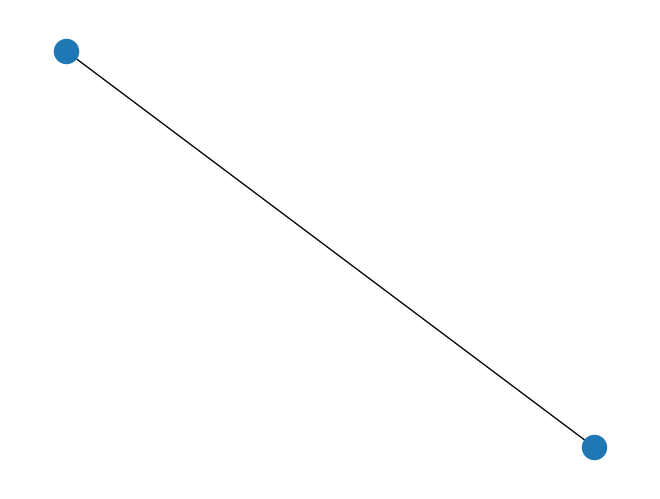

In [78]:
nx.draw(g)